 $\color{red}{\text{Unsupervised ML - Netflix Movies and TV Shows Clustering}}$  








##### **Project Type**    - : Capstone - End to End Machine Learning
##### **Contribution**    - Individual
##### **By - Muhasib Shaikh**


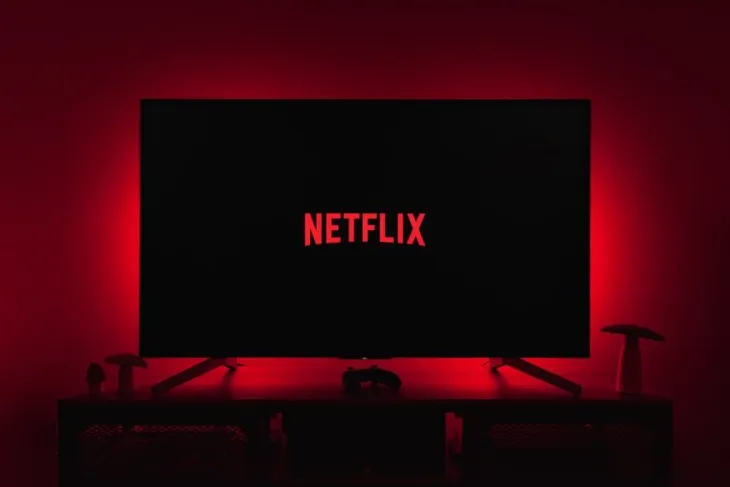

# **Project Summary -**

Introduction:

This project delves into a dataset from 2019, sourced from Flixable, highlighting the evolution of Netflix's content landscape. Notably, a 2018 report reveals a tripling of TV shows while movies decrease by over 2,000 titles since 2010. The objective is to perform Exploratory Data Analysis (EDA), understanding content availability across countries, assessing Netflix's focus on TV versus movies, and employing clustering for text-based feature analysis.

Main Analyses:

The EDA dissects the dataset, presenting insights into the distribution of TV shows and movies, genre prevalence, and temporal trends. Concurrently, a global perspective is gained by scrutinizing content availability across different countries, identifying regional preferences and disparities. The dataset's temporal dimension is leveraged to assess whether Netflix's content strategy has shifted towards TV shows over movies.

Advanced Analysis and Conclusion:

Integration with external datasets like IMDB ratings and Rotten Tomatoes enriches the analysis, offering a comprehensive understanding of content quality and reception. Finally, text-based features are used for clustering, revealing patterns and connections beyond traditional genre classifications. This project not only contributes to decoding Netflix's content strategy but also showcases the power of data integration and advanced analytics in extracting meaningful insights from complex datasets.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do

Exploratory Data Analysis

Understanding what type content is available in different countries

If Netflix has been increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features.

# **GitHub Link -**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
import string
!pip install reverse_geocode
import reverse_geocode
import plotly.express as px
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import pickle
!pip install shap
import shap


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
netflix_df=pd.read_csv('/content/drive/MyDrive/Netflix project data.csv')

### Dataset First View

In [4]:
# Dataset First Look
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
netflix_df.columns
list(netflix_df.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

### Dataset Information

In [6]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### What did you know about your dataset?

The dataset presents a comprehensive collection of information about TV shows and movies available on Netflix, featuring essential attributes such as show ID, type (TV show or movie), title, director, cast, country, date added, release year, rating, duration, genres, and description. Upon initial examination, it is evident that the dataset is relatively rich in content-related details, providing a basis for in-depth analysis.

The presence of missing values, particularly in the 'director,' 'cast,' 'country,' 'date_added,' and 'rating' columns, requires attention. To address this, missing values in 'director,' 'cast,' and 'country' have been replaced with 'Unknown,' and the 'rating' column has been imputed with the mode. A total of 2389 missing values in the 'director' column, 718 in 'cast,' 507 in 'country,' 10 in 'date_added,' and 7 in 'rating' have been handled through these procedures.

Given the diverse nature of the dataset, exploration can encompass a wide range of analyses. Possible avenues include understanding the distribution of content types (TV shows vs. movies), exploring trends in release years, assessing the prevalence of content across different countries, and delving into the correlation between certain attributes such as rating and viewer reception. Furthermore, leveraging external datasets or sources, such as IMDB ratings or Rotten Tomatoes, could enhance the analysis by providing additional dimensions for evaluating content quality.

In summary, this Netflix dataset offers a comprehensive foundation for exploratory data analysis, requiring careful consideration of missing values. The ensuing analysis could unravel trends, preferences, and patterns within the streaming service's content library, ultimately providing valuable insights into Netflix's content strategy and viewer engagement.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
netflix_df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Dataset Describe
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description



1.   show_id: Unique identifier for each show or movie on Netflix.

2. type: Categorization of the content as either "Movie" or "TV Show."

3. title: The title of the show or movie.

4. director: The director(s) of the show or movie. Missing values are filled with "Unknown."

5. cast: The main cast or actors involved in the show or movie. Missing values are filled with "Unknown."

6. country: The country or countries where the show or movie is available. Missing values are filled with "Unknown."

7. date_added: The date when the show or movie was added to the Netflix catalog.

8. release_year: The year when the show or movie was originally released.

9. rating: The content rating assigned to the show or movie. Missing values are filled with the mode (most frequent value).

10. duration: The duration of the show or movie (e.g., "1 Season" for TV shows, "90 min" for movies).

11. listed_in: Categories or genres to which the show or movie belongs.

12. description: A brief description or summary of the show or movie.




### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.

pd.Series({col:netflix_df[col].unique() for col in netflix_df})


show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object

In [11]:
for i in netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is:-",netflix_df[i].nunique(), ".")

No. of unique values in  show_id is:- 7787 .
No. of unique values in  type is:- 2 .
No. of unique values in  title is:- 7787 .
No. of unique values in  director is:- 4049 .
No. of unique values in  cast is:- 6831 .
No. of unique values in  country is:- 681 .
No. of unique values in  date_added is:- 1565 .
No. of unique values in  release_year is:- 73 .
No. of unique values in  rating is:- 14 .
No. of unique values in  duration is:- 216 .
No. of unique values in  listed_in is:- 492 .
No. of unique values in  description is:- 7769 .


In [12]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Data Wrangling**

**Checking Duplicate / Null / Missing Values**

In [13]:
# Dataset Duplicate Value Count
duplicate_count = netflix_df.duplicated().sum()
print(duplicate_count)

0


In [14]:
# Missing Values/Null Values Count
missing_values_count =netflix_df.isnull().sum()
print(missing_values_count)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [15]:
missing_percentage = (netflix_df.isnull().sum() / len(netflix_df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


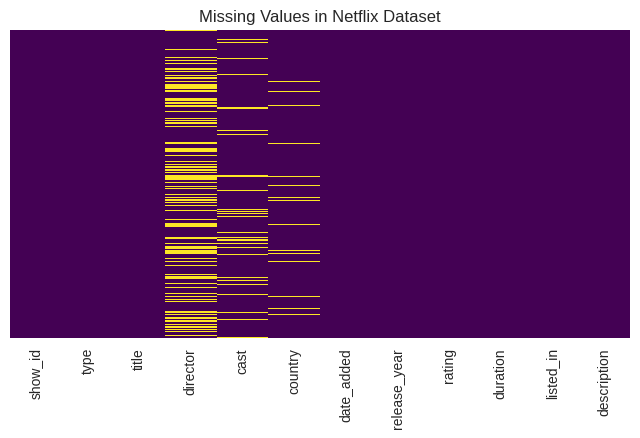

In [16]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt


missing_values = netflix_df.isnull()

# Plotting missing values
plt.figure(figsize=(8, 4))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in Netflix Dataset')
plt.show()


In [17]:
# handaling missing values

netflix_df[['director', 'cast']] = netflix_df[['director', 'cast']].fillna('Unknown')
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df.dropna(axis=0, inplace=True)

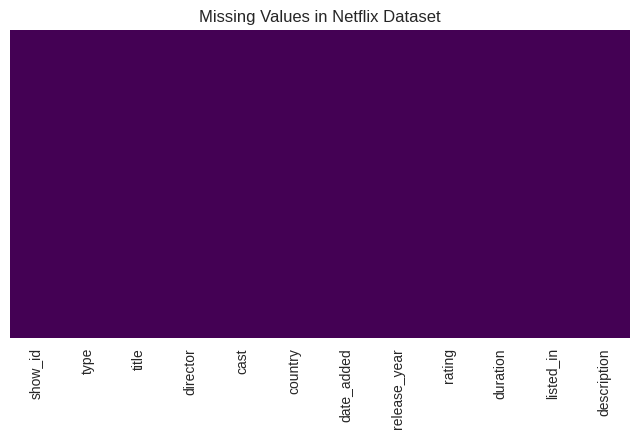

In [18]:
# checking again missing values by visualisng
missing_values = netflix_df.isnull()

# Plotting missing values
plt.figure(figsize=(8, 4))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in Netflix Dataset')
plt.show()

**Handling nested columns**

In [19]:
import pandas as pd


netflix_df_copy = netflix_df.copy()

# Unnesting 'director' column
netflix_df_copy_director_unnested = netflix_df_copy.explode('director')

# Unnesting 'cast' column
netflix_df_copy_cast_unnested = netflix_df_copy.explode('cast')

# Unnesting 'listed_in' column
netflix_df_copy_listed_in_unnested = netflix_df_copy.explode('listed_in')

# Unnesting 'country' column
netflix_df_copy_country_unnested = netflix_df_copy.explode('country')

# Display the unnested DataFrames
print("Unnested 'director' DataFrame:")
print(netflix_df_copy_director_unnested)

# Continue with other unnesting operations as needed...


Unnested 'director' DataFrame:
     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel G

In [20]:
import pandas as pd

# Convert 'date_added' column to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

# Extract day, month, and year components
netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['year_added'] = netflix_df['date_added'].dt.year


In [21]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  day_added     7770 non-null   int64         
 13  month_added   7770 non-null   int64         
 14  year_added    7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

**Data wrangling performed:**

**What all manipulation have you done and insight you found?**

Handling null/missing/ values



1.   We have imputed 'director' and 'cast' with 'Unknown'
2.   Imputed 'country' with mode value. and dropping other null values.

We have also Unnested values from 'director' , 'cast' ,'listed_in' , 'country'.


We have typecasted following features

1.   'duration' into integer
2.   'date_added' to date time.

We have extracted following features

1.   date,month,year from date_added












**Description for movies columns**

TV-Y: All Children. ...

TV-Y7: Directed to Older Children. ...

TV-Y7 FV: Directed to Older Children - Fantasy Violence. ...

TV-G: General Audience. ...

TV-PG: Parental Guidance Suggested. ...

TV-14: Parents Strongly Cautioned. ...

TV-MA: Mature Audience Only.

In [22]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  day_added     7770 non-null   int64         
 13  month_added   7770 non-null   int64         
 14  year_added    7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

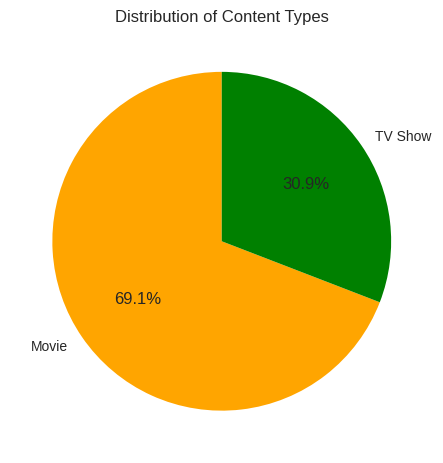

In [23]:
# Chart1 - Distribution of types

type_counts = netflix_df['type'].value_counts()

# Set the colors to orange and green
colors = ['orange', 'green']

plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Content Types')
plt.show()




##### 1. Why did you pick the specific chart?

The goal is to represent the count of movies and TV shows, which are two categories of the 'type' variable. A piechart is well-suited for displaying the frequency or count of each category in a categorical variable.

The 'type' variable is categorical, with only two distinct values ('movie' and 'TV show'). A piechart is ideal for categorical variables as it presents a clear visual representation of the count or distribution of each category.



##### 2. What is/are the insight(s) found from the chart?

We have double number of movies than tv shows produced by netflix. Movies Outnumber TV shows.

##### 3. Will the gained insights help creating a positive business impact?
we have large number of movies , almost double than tv show. All business prespective depends upon the viewers review and intrests.
Netflix can try to produce more numbers of tv shows.





#### Chart - 2

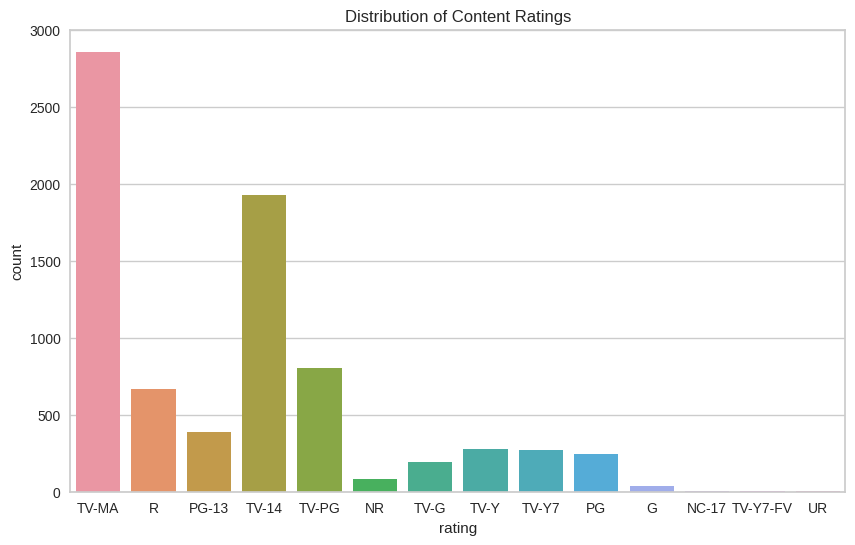

In [24]:

# Chart 2: Content by Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix_df)
plt.title('Distribution of Content Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are excellent for comparing the quantities or frequencies of different categories. The length of each bar directly corresponds to the value it represents.

##### 2. What is/are the insight(s) found from the chart?

The bar plot shows the count of shows for each rating category. From the chart,
 we can identify the rating categories that have the highest bars like TV-MA, TV-14, indicating the most common ratings on Netflix. For example, we observe that "TV-MA" (mature audience) or "TV-14" (suitable for viewers aged 14 and above) are the most prevalent ratings.


##### 3. Will the gained insights help creating a positive business impact?
As per the insights of chart netflix produces large amount of matured
 audiance contents.

 Insight into the distribution of ratings can guide decisions related to content acquisition and production. By identifying the rating categories that have higher counts, Netflix can prioritize acquiring or producing content in those categories to cater to viewer demand.

#### Chart - 3

In [25]:
# chart 3
country_group = netflix_df['country'].value_counts().reset_index()

# Renaming columns for clarity
country_group.columns = ['Country', 'Count']

# Selecting the top ten countries
top_ten_countries = country_group.head(10)

# Creating an interactive pie chart using Plotly Express
fig = px.pie(top_ten_countries, values='Count', names='Country', title='Top 10 Countries with Highest Number of Shows')

# Adding interactivity to the chart
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(legend_title='Country')

# Show the interactive plot
fig.show()



##### 1. Why did you pick the specific chart?

Pie charts are particularly useful for visualizing categorical data, where data points fall into distinct categories.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the countries that have the highest count of shows within the dataset. By examining the proportions of the pie slices, we can quickly identify which countries dominate in terms of the number of shows available.

Popular Markets: The chart reveals the countries like United States, India, and UK with a significant presence in the dataset, indicating the popularity and reach of Netflix in those particular markets. This information can be valuable for business decision-making.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The pie chart allows businesses to assess their market share relative to other countries. This insight helps in understanding the competitive landscape and identifying areas where they may need to strengthen their presence or differentiate their offerings to maintain or gain market share.

#### Chart - 4

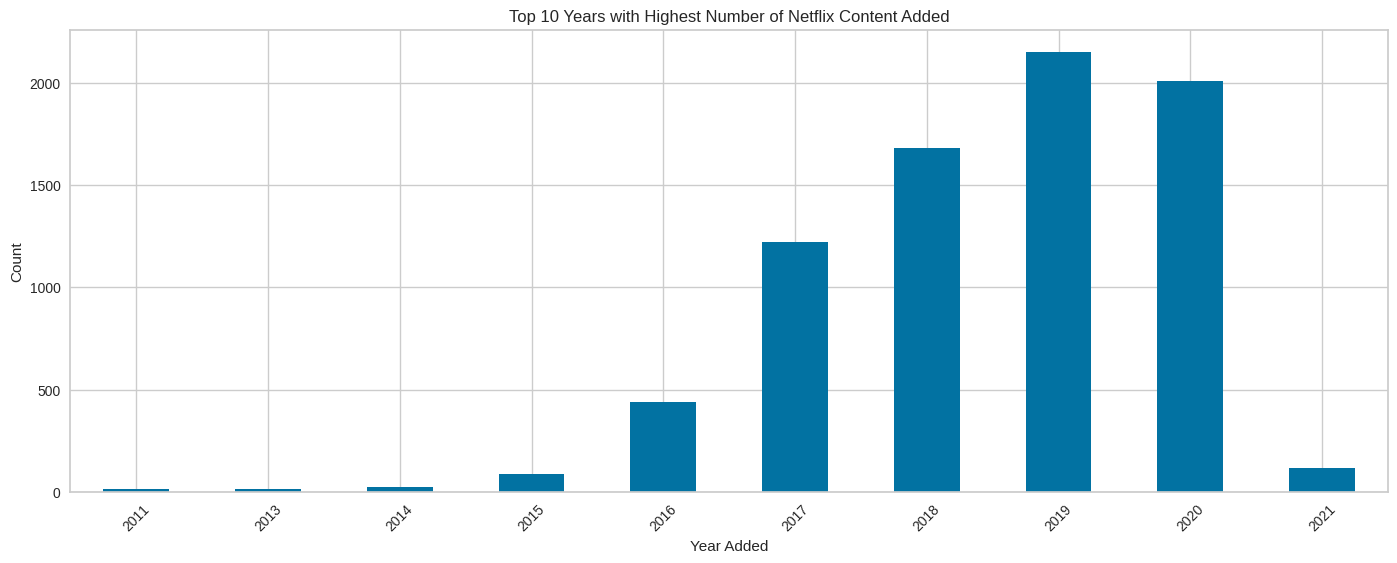

In [26]:
# Chart - 4 visualization code

year_added_counts = netflix_df['year_added'].value_counts().head(10)

# Sorting the years in ascending order
year_added_counts = year_added_counts.sort_index()

# Creating a bar plot to visualize the year added distribution
plt.figure(figsize=(17, 6))
year_added_counts.plot(kind='bar')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Top 10 Years with Highest Number of Netflix Content Added')
plt.xticks(rotation=45)
plt.show()



##### 1. Why did you pick the specific chart?

The simplicity of bar charts makes them easy to interpret, even for individuals with limited data visualization experience. We can easily compare large dataset

##### 2. What is/are the insight(s) found from the chart?

The bar plot show the count of content released in each year. By examining the chart, can identify the years with the highest bars, like 2018, 2019 indicating the years when Netflix released a significant amount of content. This insight can help identify the years that were particularly popular for content production or acquisition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the years with the highest count of content releases can inform content planning and acquisition strategies. By focusing on the years that have been popular in terms of content, Netflix can make data-driven decisions on acquiring content licenses or producing original shows for those specific years. This can help ensure a strong content lineup that aligns with viewer preferences, potentially attracting and retaining subscribers.

#### Chart - 5

In [27]:
#chart 5
import plotly.express as px

# Filter out 'Unknown' values from the 'type' column
df_filtered = netflix_df[netflix_df['type'] != 'Unknown']

# Group by release year and type, and get the count and top genre for each year
df_grouped = df_filtered.groupby(['release_year', 'type']).agg({'type': 'count', 'listed_in': lambda x: x.value_counts().index[0]}).rename(columns={'type': 'Count', 'listed_in': 'Top Genre'}).reset_index()

# Get the year with the highest count for each category
df_max = df_grouped.groupby('type')['Count'].idxmax()
df_max_years = df_grouped.loc[df_max]

# Sort the data by release year and filter the top 20 years
df_sorted = df_grouped.sort_values(by='release_year')
df_top20 = df_sorted.tail(20)

# Create the comparative graph
fig = px.bar(df_top20, x='release_year', y='Count', color='type', barmode='group',
             labels={'release_year': 'Release Year', 'Count': 'Count of Content', 'type': 'Category'},
             title='Comparative Count of Movies and TV Shows by Release Year')

# Add annotations for top genres
for index, row in df_max_years.iterrows():
    fig.add_annotation(x=row['release_year'], y=row['Count'], text=row['Top Genre'], showarrow=False)

# Update layout to set the background color to black
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black',
    'font_color': 'white'  # Set font color to white for better visibility
})

fig.show()



##### 1. Why did you pick the specific chart?

Bar charts are one of the most commonly used and recognized types of charts, making them familiar to a wide range of audiences, including those with varying levels of data literacy.

##### 2. What is/are the insight(s) found from the chart?

2016 and 2017 has maximum number of release. In both categories Movies and TV show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 6

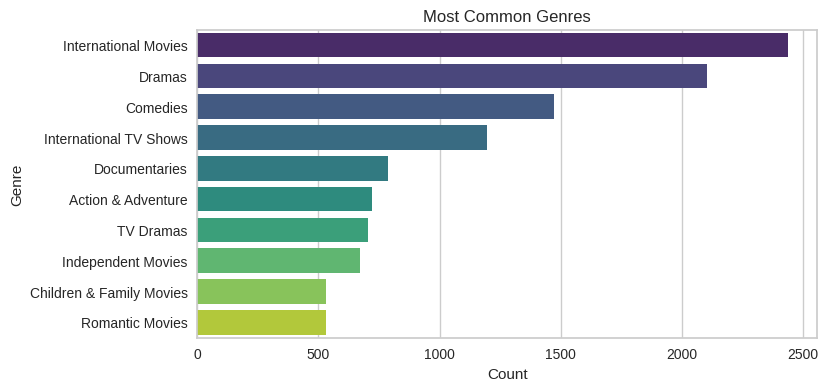

In [28]:
# chart 6
#  'listed_in' contains genres separated by commas
genres_series = netflix_df['listed_in'].str.split(',').explode().str.strip()

# Get the most common genres
top_genres = genres_series.value_counts().head(10)

# Set a larger figure size for better visibility
plt.figure(figsize=(8, 4))

# Create the count plot
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')

# Set the title
plt.title('Most Common Genres')

# Set labels
plt.xlabel('Count')
plt.ylabel('Genre')

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

Bar charts can be used to show trends over time by arranging bars chronologically, making it easy to observe patterns and changes.
The simplicity of bar charts makes them easy to interpret, even for individuals with limited data visualization experience.

##### 2. What is/are the insight(s) found from the chart?

By examining the chart, we can identify the genres with the highest bars, i.e.,Documentries, Stand up comedies, dramas, independent and international movies. indicating the most popular genres on Netflix. This insight can help understand the preferences of Netflix viewers and guide decisions related to content acquisition and production. It indicate the genres that have a higher likelihood of attracting and retaining subscribers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Top three geners should be prefered for producing upcoming content as it is most prefered content by audience.

Analyzing genre diversity and identifying niche genres can help in audience segmentation. Netflix can target specific viewer segments by curating specialized content tailored to their interests. This personalized approach can increase viewer satisfaction, engagement, and ultimately lead to positive business impact.

#### Chart - 7

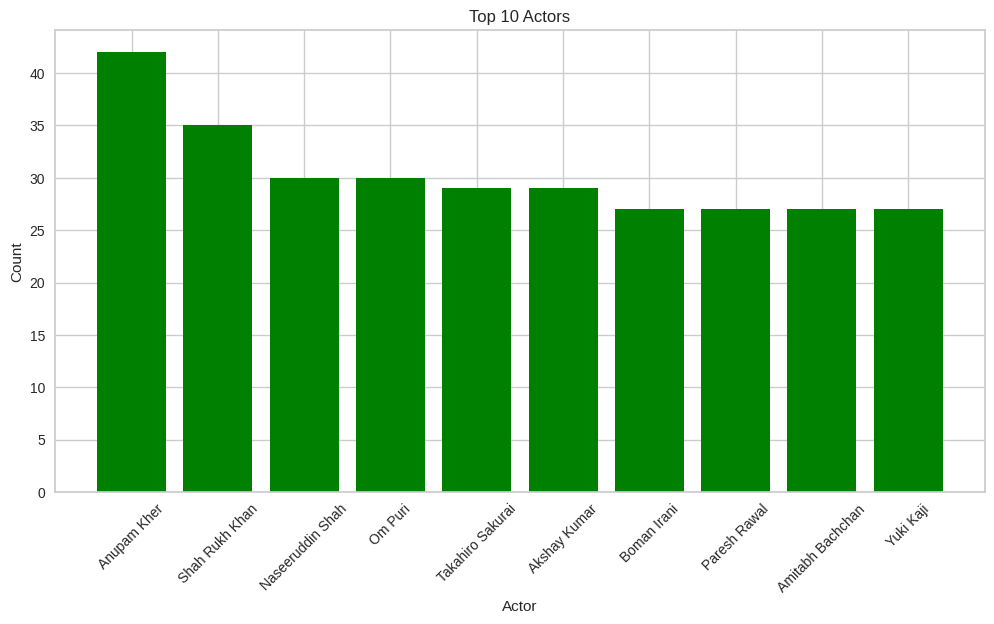

In [29]:
# Chart 7
import matplotlib.pyplot as plt
# Filter out 'unknown' values from the cast column
filtered_cast = netflix_df[netflix_df['cast'] != 'Unknown']

# Get the top 10 actors
top_actors = filtered_cast['cast'].str.split(', ').explode().value_counts().head(10)

# Create a bar chart for top actors with green color
plt.figure(figsize=(12, 6))
plt.bar(top_actors.index, top_actors.values, color='green')  # Set the color to green
plt.title('Top 10 Actors')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




##### 1. Why did you pick the specific chart?

The chart presents the data in a clear and concise manner. Each actor is represented by a separate bar, making it visually easy to distinguish and interpret the information.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the top 10 actors who have appeared in the most Netflix shows or movies. These actors have the highest counts among all the actors in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Promoting content featuring the top actors can help generate buzz and attract a wider audience. Leveraging the popularity of these actors in promotional campaigns can increase viewership and enhance brand visibility.

#### Chart - 8

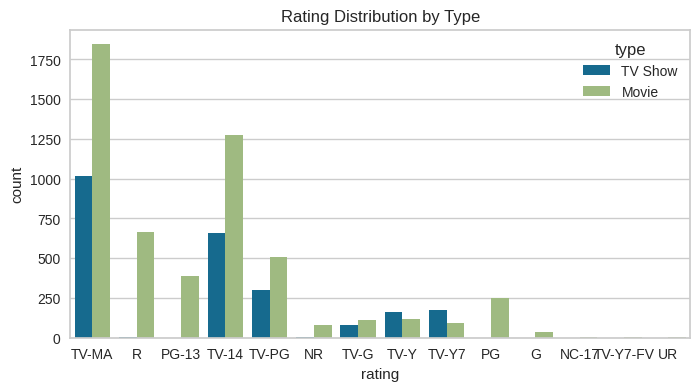

In [30]:
# Chart 8
# Rating distribution by type

plt.figure(figsize=(8, 4))
sns.countplot(x='rating', hue='type', data=netflix_df)
plt.title('Rating Distribution by Type')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is best to compare two dataset.The use of a bar plot allows for a clear comparison between different categories (in this case, ratings) and their respective counts. The length of each bar represents the count of content within a specific rating category, making it easy to compare the distribution of movies and TV shows across different ratings.

##### 2. What is/are the insight(s) found from the chart?

The chart allows for an understanding of how movies and TV shows are distributed across different rating categories. It provides insights into the overall content landscape in terms of ratings, indicating which rating categories have a higher representation of movies or TV shows.

The visualization helps identify the rating categories that are more commonly associated with movies or TV shows like here we can see TV-MA and TV-14 has the highest bar. This insight can indicate viewer preferences and expectations when it comes to the content rating, enabling content planners and creators to align their offerings accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of movies and TV shows across different ratings can inform content strategy decisions. By identifying the rating categories that have higher counts or are more popular among viewers, Netflix can focus on acquiring or producing content that aligns with viewer preferences. This targeted approach can lead to positive business impact by attracting and retaining subscribers who are more likely to engage with the content.

#### Chart - 9

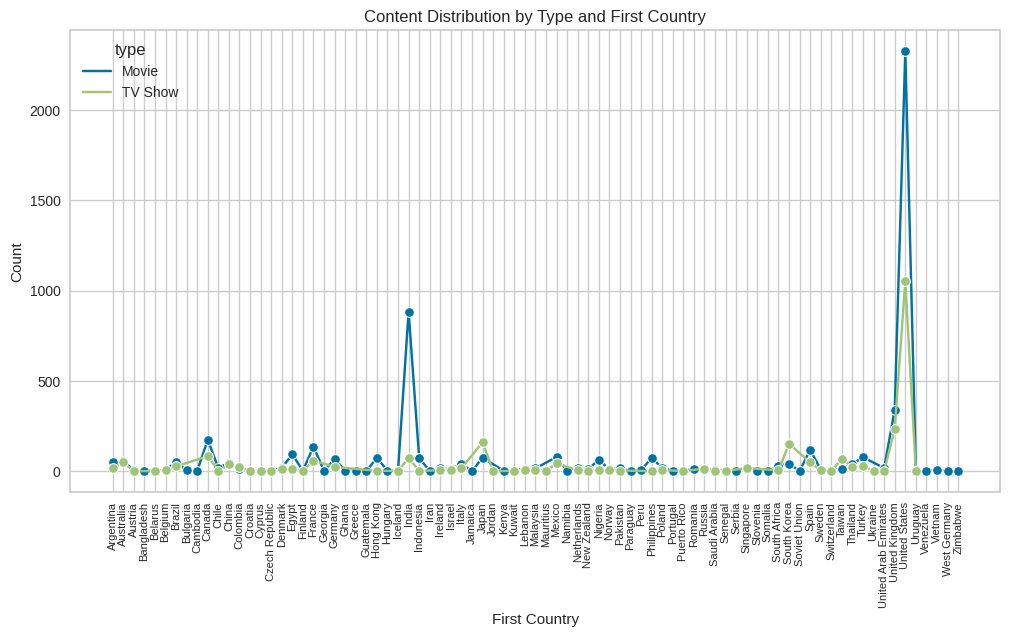

In [31]:

# Chart 9: Content Distribution by Type and Country


plt.figure(figsize=(12, 6))

# Extract the first country from the 'country' column
netflix_df['first_country'] = netflix_df['country'].str.split(',').str[0]


first_country_type_counts = netflix_df.groupby(['first_country', 'type']).size().reset_index(name='count')

# Create a line plot
sns.lineplot(x='first_country', y='count', hue='type', data=first_country_type_counts, marker='o')

plt.title('Content Distribution by Type and First Country')
plt.xlabel('First Country')
plt.ylabel('Count')
plt.xticks(rotation=90,fontsize=8)
plt.show()



##### 1. Why did you pick the specific chart?

Line charts are a versatile and effective tool for visually representing data trends and patterns. One of their greatest strengths lies in their simplicity and clarity, making complex data more accessible to a wide audience.

##### 2. What is/are the insight(s) found from the chart?

India has large number of movies. USA and UK leading in overall count of movies and TV show.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In India we can create more Tv show. So that we can create a new set of viewership.

#### Chart - 10

In [32]:
#Chart 10
import plotly.express as px

category_counts = netflix_df['listed_in'].value_counts()

# Create a DataFrame with category names and counts
treemap_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Plotting the treemap with a black background
fig = px.treemap(treemap_df, path=['Category'], values='Count', title='Treemap: Categories')

# Update the layout to set the background color to black
fig.update_layout({
    'plot_bgcolor': 'black',
    'paper_bgcolor': 'black',
    'font_color': 'white'  # Set font color to white for better visibility
})

fig.show()


##### 1. Why did you pick the specific chart?

Treemaps can be interactive, allowing users to zoom in and out of different levels of the hierarchy. This interactive feature enables deeper exploration of the data and provides a more engaging and informative experience for users.

##### 2. What is/are the insight(s) found from the chart?

The size of the rectangles in the treemap chart represents the proportion of content in each category. By comparing the sizes of the rectangles,we can identify which categories have a larger share of content compared to others. This insight highlights the relative importance or prominence of different categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The most prefered content by audiance belongs to documantory , stand up comedy and dramas.Netflix should consider this for production.

#### Chart - 11

In [33]:

# chart 11
grouped_data = netflix_df.groupby(['release_year', 'type']).size().reset_index(name='Count')

# Create a stacked area plot using Plotly Express
fig = px.area(grouped_data, x='release_year', y='Count', color='type',
              title='Number of Movies and TV Shows Released Each Year',
              labels={'release_year': 'Release Year', 'Count': 'Count', 'type': 'Content Type'},
              template='plotly_dark')

# Show the interactive plot
fig.show()



##### 1. Why did you pick the specific chart?

The choice of a stacked area plot using Plotly Express was made to provide an innovative and visually appealing representation of the data.

##### 2. What is/are the insight(s) found from the chart?

We can see increasing trend since 2000 in both categories movies and TV seriese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is decrease in movies production after 2018 , Netflix need to find out reason and need to improve whatever are the reason.

#### Chart - 12

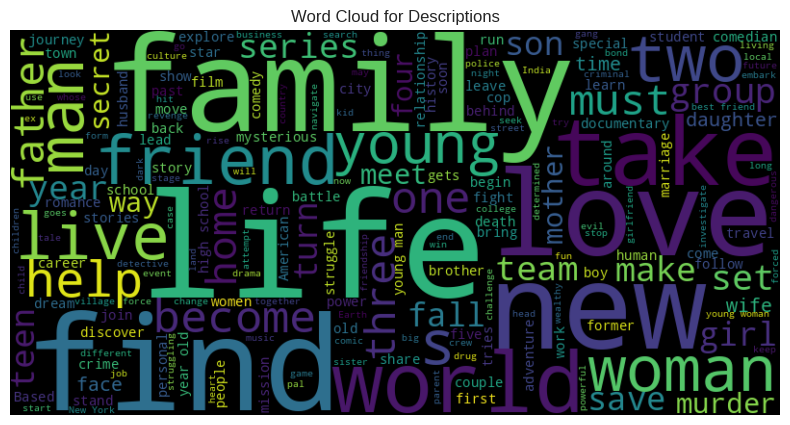

In [34]:
# Chart 12: Word Cloud for Descriptions

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'description' is the column you want to use for the word cloud
description_text = ' '.join(netflix_df['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(description_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Descriptions')
plt.show()


##### 1. Why did you pick the specific chart?

Word clouds use varying font sizes and colors to represent the frequency or importance of words in a text. This visual diversity engages viewers and highlights key terms, making it an aesthetically pleasing and captivating way to present information.

##### 2. What is/are the insight(s) found from the chart?

love, life, family,friend,new these are some most used keyword.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

we can understand the intrest of audience by using these words.

#### Chart - 13

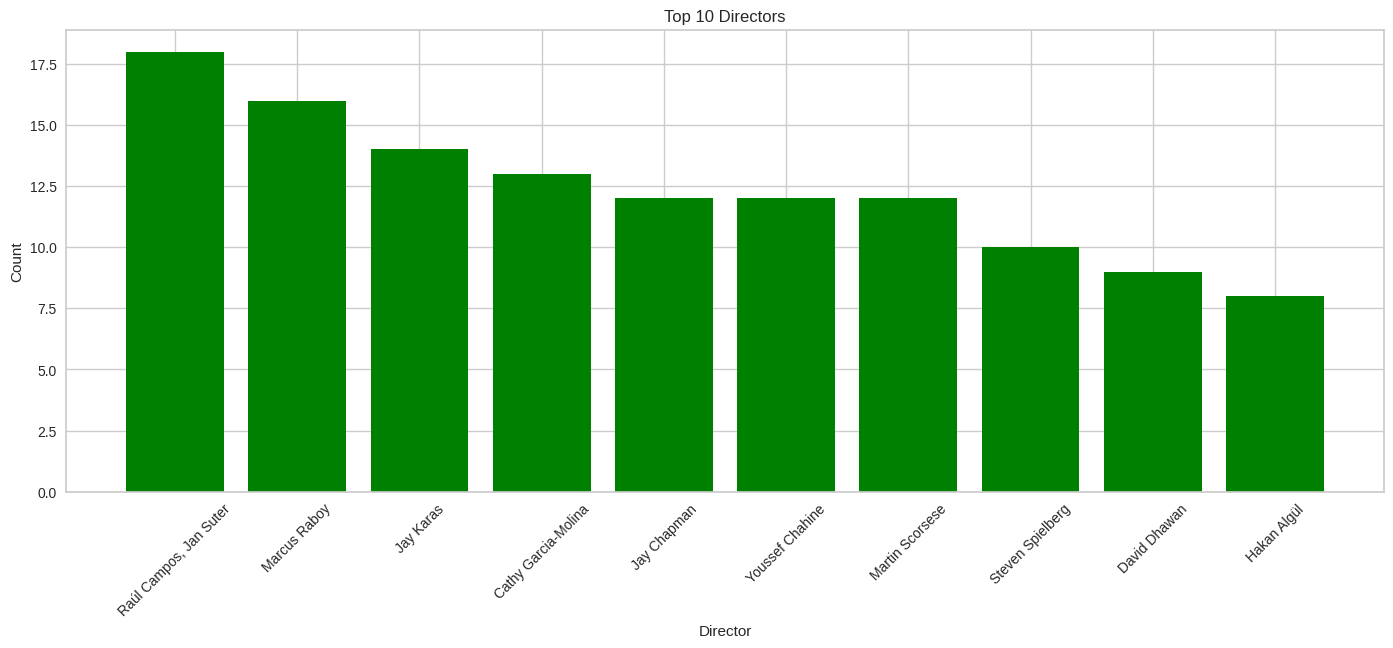

In [35]:
#chart 13
# Clean the 'director' column by removing leading and trailing whitespaces
netflix_df['director'] = netflix_df['director'].str.strip()

# Filter out 'unknown' values from the director column
filtered_directors = netflix_df[netflix_df['director'] != 'Unknown']

# Get the top 10 directors
top_directors = filtered_directors['director'].value_counts().head(10)

# Create a bar chart for top directors with green color
plt.figure(figsize=(17, 6))
plt.bar(top_directors.index, top_directors.values, color='green')  # Set the color to green
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts can be oriented both horizontally and vertically, providing flexibility in presenting data. This versatility allows for optimal visualization based on the nature of the data and the preferences of the audience.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the top 10 Directors who have appeared in the most Netflix shows or movies. These Directors have the highest counts among all the Directors in the dataset.

#### Chart - 14 - Correlation Heatmap

<ipython-input-36-3d38ea066c4a>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



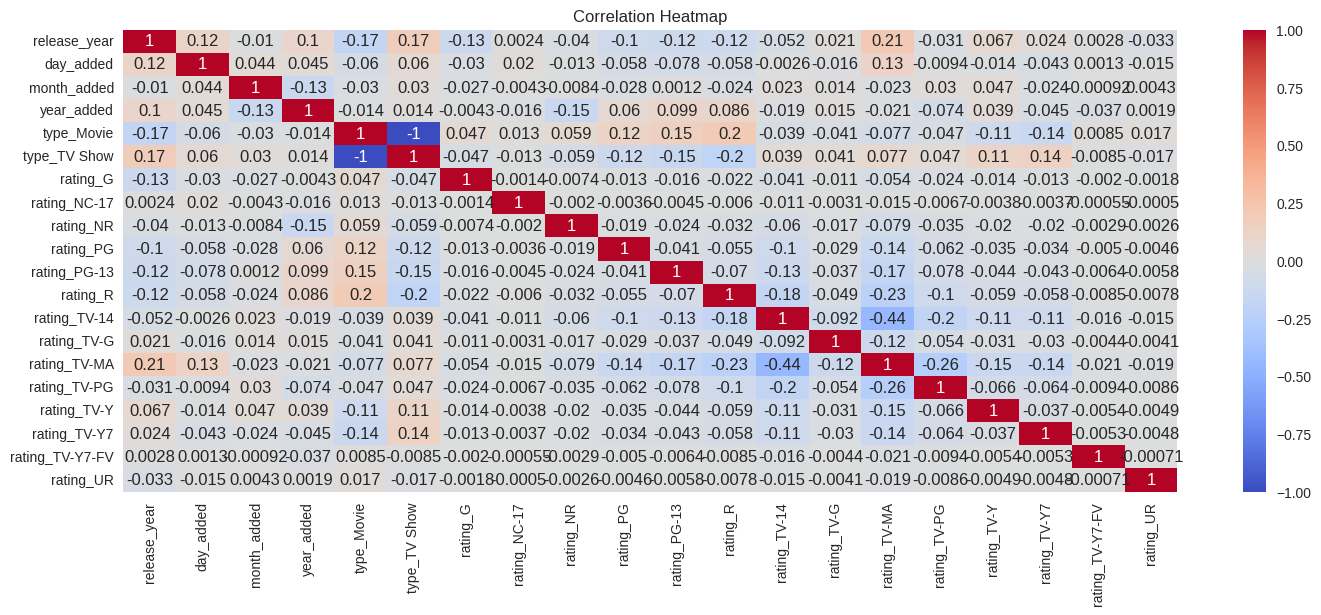

In [36]:
# chart 14
numerical_columns = ['release_year']
categorical_columns = ['type', 'rating']

# Convert categorical variables into numerical form
netflix_df_encoded = pd.get_dummies(netflix_df, columns=categorical_columns)

# Combine the numerical and encoded categorical columns
netflix_df_final = pd.concat([netflix_df_encoded[numerical_columns], netflix_df_encoded.drop(columns=numerical_columns)], axis=1)

# Calculate the correlation matrix
corr_matrix = netflix_df_final.corr()

# Plot the correlation heatmap
plt.figure(figsize=(17, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Correlation heatmaps provide a clear and intuitive visualization of relationships between variables. By using colors to represent the strength and direction of correlations, viewers can quickly identify patterns and trends in the data.

In the correlation heatmap, each cell represents the correlation coefficient between two variables. The color scale helps in identifying the strength and direction of the correlation. Positive values are typically represented by warmer colors (e.g., red), indicating a positive relationship, while negative values are represented by cooler colors (e.g., blue), indicating a negative relationship.

##### 2. What is/are the insight(s) found from the chart?

Here we found that there is only slight correlation between type_movie and type tv_show. and other variables does not show any kind of correlation between the variablls.

#### Chart - 15 - Pair Plot

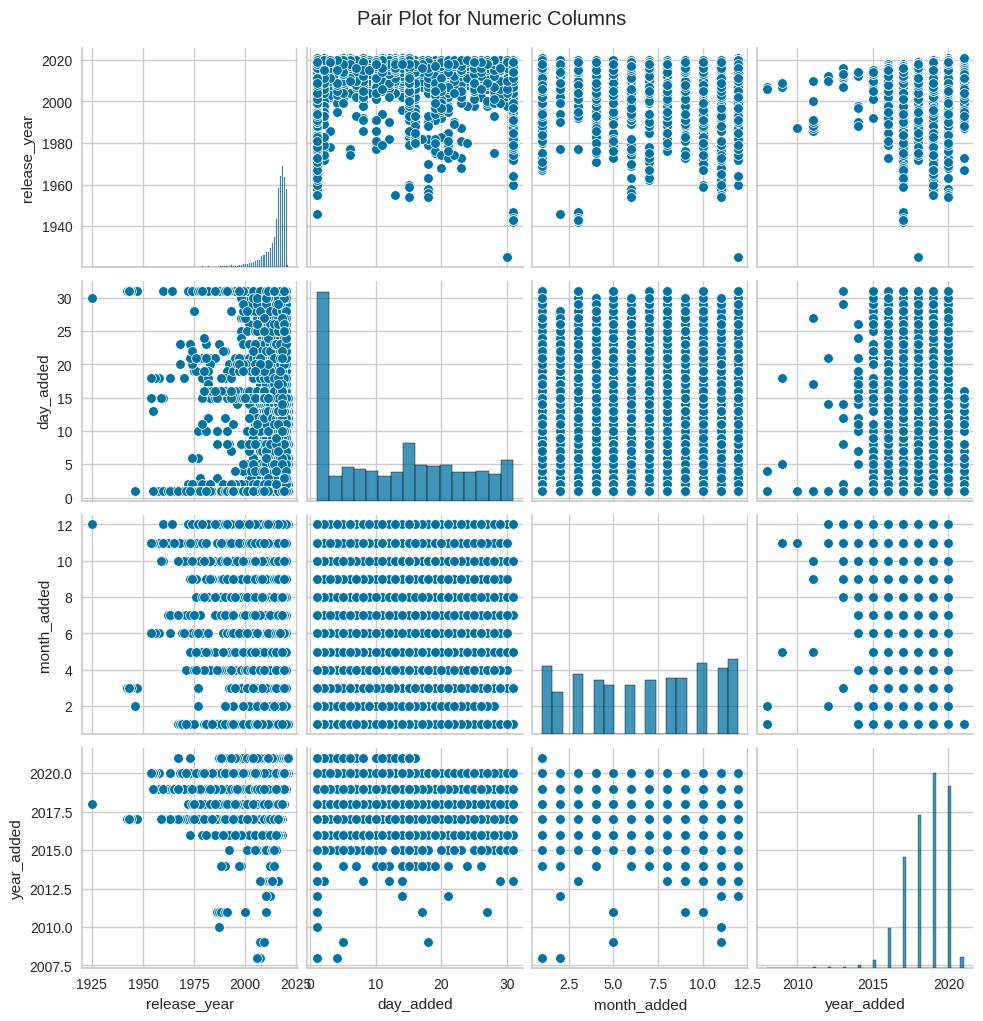

In [37]:
# chart 15
# Pair Plot
numeric_columns = netflix_df.select_dtypes(include='number').columns

# Plot the pair plot for numeric columns
sns.pairplot(netflix_df[numeric_columns])
plt.suptitle('Pair Plot for Numeric Columns', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Pair plots offer a comprehensive view of the relationships between every pair of variables in a dataset. This allows for a quick and simultaneous examination of multiple relationships, aiding in the identification of patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

We can compare many variable using these pair plots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

Hypothesis 1: The average duration of movies has not changed over the years.





#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average duration of movies has remained constant over the years.

Alternative Hypothesis (H1): The average duration of movies has changed over the years.


#### 2. Perform an appropriate statistical test.

In [38]:
from scipy.stats import ttest_ind
# Filter only movies
movies_df = netflix_df[netflix_df['type'] == 'Movie']

# Convert 'duration' column to numeric
movies_df['duration'] = pd.to_numeric(movies_df['duration'].str.extract('(\d+)')[0], errors='coerce')

# Drop rows with missing values in the 'duration' column
movies_df = movies_df.dropna(subset=['duration'])

# Split the data into two groups (early years and recent years)
early_years = movies_df[movies_df['release_year'] <= 2000]['duration']
recent_years = movies_df[movies_df['release_year'] > 2000]['duration']

# Perform a t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(early_years, recent_years, equal_var=False)

# Print the results
print("Results of the t-test:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Check the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average duration of movies has changed over the years.")
else:
    print("Fail to reject the null hypothesis: The average duration of movies has remained constant over the years.")






Results of the t-test:
T-Statistic: 9.158099873922898
P-Value: 1.5868563460692167e-18
Reject the null hypothesis: The average duration of movies has changed over the years.


<ipython-input-38-f6ae30c7c7b4>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In summary, based on the t-test results, we can conclude that there is a statistically significant difference in the average duration of movies between early years and recent years in the Netflix dataset. The positive t-statistic suggests that the average duration of movies has increased over time. This finding provides insights into potential shifts in content production or audience preferences regarding the duration of movies on the platform.

##### Which statistical test have you done to obtain P-Value?

In the analysis, a two-sample independent t-test was employed to obtain the p-value, comparing the average durations of movies in two distinct time periods: early years and recent years. The t-test is a suitable statistical test for scenarios where we want to assess if there is a significant difference between the means of two independent groups.

##### Why did you choose the specific statistical test?

The choice of the two-sample independent t-test for this analysis was driven by several considerations. Firstly, the research question involved comparing the average durations of movies in two distinct time periods: early years and recent years. The t-test is well-suited for such a scenario, specifically designed to assess whether there is a significant difference between the means of two independent groups. Secondly, the nature of the data, which consists of continuous variables (movie durations), aligns with the assumptions of the t-test, making it an appropriate choice.



### Hypothetical Statement - 2

Hypothesis 2: The distribution of ratings for movies and TV shows is the same.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The distribution of ratings for movies and TV shows is the same.

Alternative Hypothesis (H1): The distribution of ratings for movies and TV shows is different.



#### 2. Perform an appropriate statistical test.

In [39]:
from scipy.stats import chi2_contingency
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(netflix_df['rating'], netflix_df['type'])

# Perform a chi-squared test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Results of the chi-squared test:")
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

# Check the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of ratings for movies and TV shows is different.")
else:
    print("Fail to reject the null hypothesis: The distribution of ratings for movies and TV shows is the same.")



Results of the chi-squared test:
Chi-Squared Statistic: 930.2390474658954
P-Value: 1.6546187394507098e-190
Reject the null hypothesis: The distribution of ratings for movies and TV shows is different.


In summary, based on the chi-squared test results, we can conclude that there is a statistically significant difference in the distribution of ratings for movies and TV shows in the Netflix dataset. This implies that the distribution of ratings is not uniform across the two content types, and there are discernible disparities in how viewers rate movies compared to TV shows on the platform.

##### Which statistical test have you done to obtain P-Value?

In this hypothesis, a chi-squared test of independence is utilized to assess whether the distribution of ratings differs between movies and TV shows. The null hypothesis assumes that there is no association between the type of content and the distribution of ratings, while the alternative hypothesis posits a significant difference. The chi-squared test is apt for this categorical data scenario, providing insights into the independence of the two variables.



##### Why did you choose the specific statistical test?

The choice of the chi-squared test of independence for the second hypothesis was driven by the categorical nature of the data involved – specifically, the distribution of ratings across movies and TV shows. The research question sought to investigate whether there is a significant difference in the distribution of ratings between these two content types. The chi-squared test is particularly well-suited for examining associations and differences in distributions within categorical data.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3: There is no correlation between the number of movies and TV shows added each month.


Null Hypothesis (H0): There is no correlation between the number of movies and TV shows added each month.

Alternative Hypothesis (H1): There is a correlation between the number of movies and TV shows added each month.

#### 2. Perform an appropriate statistical test.

In [40]:
from scipy.stats import pearsonr


# Grouping by month and type to get the count of movies and TV shows added
monthly_counts = netflix_df.groupby(['month_added', 'type']).size().unstack()

# Perform a Pearson correlation test
corr_coefficient, p_value = pearsonr(monthly_counts['Movie'], monthly_counts['TV Show'])

# Print the results
print("Results of the Pearson correlation test:")
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-Value: {p_value}")

# Check the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a correlation between the number of movies and TV shows added each month.")
else:
    print("Fail to reject the null hypothesis: There is no correlation between the number of movies and TV shows added each month.")


Results of the Pearson correlation test:
Pearson Correlation Coefficient: 0.8098553009720773
P-Value: 0.0014087674346390036
Reject the null hypothesis: There is a correlation between the number of movies and TV shows added each month.


In summary, based on the results, we can conclude that there is a statistically significant positive correlation between the number of movies and TV shows added each month in the Netflix dataset. The practical implication might be that the addition of one type of content (movies or TV shows) is associated with an increased likelihood of adding the other type, potentially reflecting patterns in content acquisition or release strategies by Netflix.

##### Which statistical test have you done to obtain P-Value?

In this hypothesis, a Pearson correlation test is employed to assess the association between the counts of movies and TV shows added each month. The null hypothesis assumes no correlation, while the alternative hypothesis suggests the presence of a significant correlation. The Pearson correlation test is suitable for examining linear relationships between two continuous variables, making it appropriate for exploring potential correlations in this context.

##### Why did you choose the specific statistical test?

The choice of the Pearson correlation test for the third hypothesis was guided by the nature of the research question, which sought to investigate whether there is a correlation between the counts of movies and TV shows added each month. The Pearson correlation test is specifically designed to assess linear relationships between two continuous variables, making it suitable for examining the potential correlation in this context.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation

print(netflix_df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(netflix_df.isnull(), cbar=False)
plt.show()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
day_added        0
month_added      0
year_added       0
first_country    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing value in our dataset.

### 2. Handling Outliers

In [42]:
# Handling Outliers & Outlier treatments
# Function for displaying outliers
def outlier_show(df):
    sns.boxplot(df['release_year'])
    plt.xticks(np.arange(1920, 2031, 10))
    plt.show()

def outlier_action(df):
    q1, q3 = np.percentile(df['release_year'], [25, 75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    df = df[df['release_year'] > lower]
    return df

# Treating the outliers by applying the function
print('Before Taking Action')
outlier_show(netflix_df)

for i in range(2):
    print('After Taking Action', i+1)
    netflix_df = outlier_action(netflix_df)

outlier_show(netflix_df)




Before Taking Action


After Taking Action 1
After Taking Action 2


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Outlier Treatment Technique: Interquartile Range (IQR) Method**

**Identification of Outliers:**

The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data.
Outliers are identified as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
Action Taken:

Outliers are removed from the dataset.

### 3. Categorical Encoding

In [43]:

# Split 'duration' into separate columns for Season_duration and Movies_duration
netflix_df[['Season_duration', 'Movies_duration']] = netflix_df['duration'].str.extract('(\d+) Season.*|(\d+) min')

# Convert 'Season_duration' and 'Movies_duration' columns to numeric values
netflix_df['Season_duration'] = pd.to_numeric(netflix_df['Season_duration'], errors='coerce')
netflix_df['Movies_duration'] = pd.to_numeric(netflix_df['Movies_duration'], errors='coerce')

# Replace missing values in 'Season_duration' for TV shows with 0
netflix_df.loc[netflix_df['type'] == 'TV Show', 'Season_duration'] = netflix_df.loc[netflix_df['type'] == 'TV Show', 'Season_duration'].fillna(0)

# Replace missing values in 'Movies_duration' for movies with 0 duration
netflix_df.loc[netflix_df['type'] == 'Movie', 'Movies_duration'] = netflix_df.loc[netflix_df['type'] == 'Movie', 'Movies_duration'].fillna(0)

# Combining 'Season_duration' and 'Movies_duration' into a single 'duration' column
netflix_df['duration'] = netflix_df.apply(lambda row: f"{int(row['Season_duration'])} Seasons" if row['type'] == 'TV Show' else f"{int(row['Movies_duration'])} min", axis=1)

netflix_df['Season_duration'] = netflix_df['Season_duration'].fillna(0)
netflix_df['Movies_duration'] = netflix_df['Movies_duration'].fillna(0)


In [44]:

# Create 'movie' and 'tv_show' columns
netflix_df['movie'] = netflix_df['type'].apply(lambda x: 1 if x == "Movie" else 0)
netflix_df['tv_show'] = netflix_df['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Drop unnecessary columns
netflix_df.drop(columns=['type', 'duration'], inplace=True)


In [45]:
netflix_df.head()

show_id  title           director  \
0      s1     3%            Unknown   
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
5      s6     46        Serdar Akar   
6      s7    122    Yasir Al Yasiri   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...     Turkey 2017-07-01   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...      Egypt 2020-06-01   

   release_year rating                                          listed_in  \
0          2020  TV-MA  International TV Shows, TV Dramas, TV Sci-Fi &...   
1          2016  TV-MA                       Dramas, International Movies   
2          2011      R                Horror Movies, International Movies   
5          2016  TV-MA    International TV Shows, TV Dramas, TV Mysteries   
6          2019  TV-MA                Horror Movies, International Movies   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   
1  After a devastating earthquake hits Mexico Cit...         23           12   
2  When an army recruit is found dead, his fellow...         20           12   
5  A genetics professor experiments with a treatm...          1            7   
6  After an awful accident, a couple admitted to ...          1            6   

   year_added first_country  Season_duration  Movies_duration  movie  tv_show  
0        2020        Brazil              4.0              0.0      0        1  
1        2016        Mexico              0.0             93.0      1        0  
2        2018     Singapore              0.0             78.0      1        0  
5        2017        Turkey              1.0              0.0      0        1  
6        2020         Egypt              0.0             95.0      1        0

#### What all categorical encoding techniques have you used & why did you use those techniques?

"I applied one-hot encoding to the 'type' variable in my dataset. One-hot encoding is a suitable technique for variables with distinct categories and no inherent ordinal relationship. In the case of the 'type' variable, it is a nominal categorical variable with two distinct categories: 'Movie' and 'TV Show'. One-hot encoding transforms this categorical variable into two binary columns, 'movie' and 'tv_show'. The 'movie' column represents the presence (1) or absence (0) of the 'Movie' category, while the 'tv_show' column represents the presence (1) or absence (0) of the 'TV Show' category. This encoding method captures the categorical information without assuming any ordinal relationship between the categories, providing a clear representation of the data's categorical structure."

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
pip install contractions


In [48]:
pip install --upgrade contractions


In [49]:
# Expanding contractions
netflix_df['cluster_var'] = (netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['description'])
netflix_df.drop(columns=['director', 'cast', 'listed_in', 'description'])



show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
5         s6                                       46   
6         s7                                      122   
...      ...                                      ...   
7780   s7781                                      Zoo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                    country date_added  release_year rating  \
0                                    Brazil 2020-08-14          2020  TV-MA   
1                                    Mexico 2016-12-23          2016  TV-MA   
2                                 Singapore 2018-12-20          2011      R   
5                                    Turkey 2017-07-01          2016  TV-MA   
6                                     Egypt 2020-06-01          2019  TV-MA   
...                                     ...        ...           ...    ...   
7780                                  India 2018-07-01          2018  TV-MA   
7783                                  India 2019-03-02          2015  TV-14   
7784                          United States 2020-09-25          2019  TV-MA   
7785                              Australia 2020-10-31          2019  TV-PG   
7786  United Kingdom, Canada, United States 2020-03-01          2019  TV-MA   

      day_added  month_added  year_added   first_country  Season_duration  \
0            14            8        2020          Brazil              4.0   
1            23           12        2016          Mexico              0.0   
2            20           12        2018       Singapore              0.0   
5             1            7        2017          Turkey              1.0   
6             1            6        2020           Egypt              0.0   
...         ...          ...         ...             ...              ...   
7780          1            7        2018           India              0.0   
7783          2            3        2019           India              0.0   
7784         25            9        2020   United States              0.0   
7785         31           10        2020       Australia              1.0   
7786          1            3        2020  United Kingdom              0.0   

      Movies_duration  movie  tv_show  \
0                 0.0      0        1   
1                93.0      1        0   
2                78.0      1        0   
5                 0.0      0        1   
6                95.0      1        0   
...               ...    ...      ...   
7780             94.0      1        0   
7783            111.0      1        0   
7784             44.0      1        0   
7785              0.0      0        1   
7786             90.0      1        0   

                                            cluster_var  
0     Unknown João Miguel, Bianca Comparato, Michel ...  
1     Jorge Michel Grau Demián Bichir, Héctor Bonill...  
2     Gilbert Chan Tedd Chan, Stella Chung, Henley H...  
5     Serdar Akar Erdal Beşikçioğlu, Yasemin Allen, ...  
6     Yasir Al Yasiri Amina Khalil, Ahmed Dawood, Ta...  
...                                                 ...  
7780  Shlok Sharma Shashank Arora, Shweta Tripathi, ...  
7783  Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...  
7784  Unknown Nasty C Documentaries, International M...  
7785  Unknown Adriano Zumbo, Rachel Khoo Internation...  
7786  Sam Dunn Unknown Documentaries, Music & Musica...  

[6596 rows x 15 columns]

#### 2. Lower Casing

In [50]:
## Lowercasing the 'column' in 'netflix_df'
def convert_to_lower(df, column):
    df[column] = df[column].str.lower()

In [51]:
convert_to_lower(netflix_df, 'cluster_var')

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations
import string

# Function to remove punctuations from a specific column in the DataFrame
def remove_punctuations(df, column):
    df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Example usage for the 'cluster_var' column
remove_punctuations(netflix_df, 'cluster_var')


#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits
# Function to remove URLs from a specific column in the DataFrame
def remove_urls(df, column):
    df[column] = df[column].str.replace(r'http\S+|www\.\S+', '', regex=True)

# Function to remove words with digits from a specific column in the DataFrame
def remove_words_with_digits(df, column):
    df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if not any(char.isdigit() for char in word)))

# Example usage for the 'cluster_var' column
remove_urls(netflix_df, 'cluster_var')
remove_words_with_digits(netflix_df, 'cluster_var')


#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

# Function to remove stopwords from a specific column in the DataFrame
def remove_stopwords(df, column):
    stopwords_list = stopwords.words('english')
    df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stopwords_list))

# Example usage for the 'cluster_var' column
remove_stopwords(netflix_df, 'cluster_var')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
netflix_df['cluster_var'].value_counts

<bound method IndexOpsMixin.value_counts of 0       unknown joão miguel bianca comparato michel go...
1       jorge michel grau demián bichir héctor bonilla...
2       gilbert chan tedd chan stella chung henley hii...
5       serdar akar erdal beşikçioğlu yasemin allen me...
6       yasir al yasiri amina khalil ahmed dawood tare...
                              ...                        
7780    shlok sharma shashank arora shweta tripathi ra...
7783    mozez singh vicky kaushal sarahjane dias raagh...
7784    unknown nasty c documentaries international mo...
7785    unknown adriano zumbo rachel khoo internationa...
7786    sam dunn unknown documentaries music musicals ...
Name: cluster_var, Length: 6596, dtype: object>

In [56]:
# Remove White spaces
def remove_whitespace(text):
    """
    Removes white spaces from a given text.

    Parameters:
        text (str): The input text containing white spaces.

    Returns:
        str: The text with white spaces removed.
    """
    return text.replace(" ", "")



#### 6. Rephrase Text

In [57]:
# rephrase text

#### 7. Tokenization

In [58]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenization and Vectorization Function
def getVectorized(df):
    # Initialize the CountVectorizer
    count_vectorizer = CountVectorizer()

    # Tokenize and vectorize the text
    tokenized_text = count_vectorizer.fit_transform(df['cluster_var'])

    # Collecting the vocabularies
    vocabulary = count_vectorizer.vocabulary_.items()

    return vocabulary

# Applying the above function and showing the features
dictionary_cluster_col = getVectorized(netflix_df)



In [60]:
dictionary_cluster_col

dict_items([('unknown', 41483), ('joão', 20073), ('miguel', 25820), ('bianca', 4480), ('comparato', 8115), ('michel', 25748), ('gomes', 15314), ('rodolfo', 33564), ('valente', 41810), ('vaneza', 41883), ('oliveira', 28773), ('rafael', 31948), ('lozano', 23560), ('viviane', 42469), ('porto', 30987), ('mel', 25434), ('fronckowiak', 14177), ('sergio', 35613), ('mamberti', 24253), ('zezé', 44546), ('motta', 26698), ('celso', 6752), ('frateschi', 14052), ('international', 18763), ('tv', 41114), ('shows', 36386), ('dramas', 11017), ('scifi', 35150), ('fantasy', 13048), ('future', 14334), ('elite', 11797), ('inhabit', 18612), ('island', 18987), ('paradise', 29623), ('far', 13054), ('crowded', 8887), ('slums', 36994), ('get', 14890), ('one', 28868), ('chance', 6922), ('join', 19900), ('saved', 34881), ('squalor', 37722), ('jorge', 20004), ('grau', 15564), ('demián', 9843), ('bichir', 4495), ('héctor', 18062), ('bonilla', 5067), ('oscar', 29099), ('serrano', 35633), ('azalia', 3129), ('ortiz', 

#### 8. Text Normalization

In [61]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import SnowballStemmer

# Create an instance of the SnowballStemmer for English
stemmer = SnowballStemmer('english')

# Assuming 'netflix_df' is your DataFrame and 'cluster_var' is the column you want to stem
netflix_df['cluster_var_stemmed'] = netflix_df['cluster_var'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# 'cluster_var_stemmed' now contains the stemmed version of 'cluster_var'

In [62]:
def assignWordsAndCountsToList(dictionary):
    vocab_list = []
    vocab_counts_list = []

    for key, value in dictionary.items():
        vocab_list.append(key)
        vocab_counts_list.append(value)

    return vocab_list, vocab_counts_list



In [63]:
#vocabulary_dictionary = getVectorized(netflix_df['cluster_var_stemmed'])

vocab_cluster, vocab_counts_cluster = assignWordsAndCountsToList(dict(dictionary_cluster_col))

# Create a DataFrame for words and counts before stemming
df_cluster_before_stem = pd.DataFrame({'word': vocab_cluster, 'count': vocab_counts_cluster}).sort_values(by='count', ascending=False)

# Display the top 20 words and counts
df_cluster_before_stem.head(20).T


24814     43309     41085  37124  20098   20096  29523  27591  22418  \
word    ṣọpẹ  żurawski  żulewska    źak  şükrü  şükran   şçil   ştar   şler   
count  44882     44881     44880  44879  44878   44877  44876  44875  44874   

       38140   17578   17615  42970     25948  24293    21459   23791   24296  \
word   şiten  şinasi  şimşek  şeref  şenolsun  şenol  şenocak  şenhuy  şendil   
count  44873   44872   44871  44870     44869  44868    44867   44866   44865   

       23843  30172  
word   şenay    şen  
count  44864  44863

##### Which text normalization technique have you used and why?

The code employs a text normalization technique known as stemming. Stemming involves the process of reducing words to their base or root form, essentially removing prefixes and suffixes to capture the core meaning or stem of each word.

The chosen stemming method in this code is Snowball stemming, implemented through the SnowballStemmer class from the Natural Language Toolkit (NLTK). Snowball stemming is particularly useful as it supports stemming for multiple languages.

Stemming is a common practice in natural language processing and text mining, especially when conducting word-level analysis. Its primary purpose is to minimize word variations and unify similar words into a standardized form. This standardization enhances the efficiency of subsequent text analysis and information retrieval tasks.

In the provided code, the SnowballStemmer is applied to the 'cluster_var' column of a DataFrame, transforming each word into its stemmed version. This normalization step aids in preparing the text for further analysis by simplifying words to their foundational forms. The resulting 'cluster_var_stemmed' column holds the stemmed versions of the original text.

The code also includes the creation of vocabulary lists and a DataFrame both before and after stemming. The DataFrame before stemming ('df_cluster_before_stem') is particularly insightful, displaying the top 20 words and their counts. This pre-stemming snapshot allows for a comparison between the original and stemmed versions, showcasing the impact of stemming on the dataset.

Overall, stemming serves as a crucial preprocessing step, facilitating more effective and streamlined text analysis.

#### 9. Part of speech tagging

In [64]:
# POS Taging
import nltk
from nltk import word_tokenize, pos_tag

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the sentence
tokens = word_tokenize(sentence)

# Perform part-of-speech tagging
pos_tags = pos_tag(tokens)

# Display the part-of-speech tags
print(pos_tags)


[('The', 'DT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### 10. Text Vectorization

In [65]:
# Vectorizing Text
def proportionToNumber(proportion, data):
    return int(proportion * data / 100)

num = proportionToNumber(1, len(netflix_df))

# Vectorizing Text discarding features which are available less than 1% of the dataset and more than 90%
tfidf_vectorizer = TfidfVectorizer(min_df=num, max_df=0.9)

features_array = tfidf_vectorizer.fit_transform(netflix_df['cluster_var']).toarray()
features_names = tfidf_vectorizer.get_feature_names_out()

# Print the shape of the vectorized text and the shape of the dataframe
print("Vectorized Text Shape:", features_array.shape)
print("DataFrame Shape:", netflix_df.shape)


Vectorized Text Shape: (6596, 336)
DataFrame Shape: (6596, 20)


In [66]:
X = pd.DataFrame(features_array, columns= features_names)
X.shape

(6596, 336)

##### Which text vectorization technique have you used and why?

The code utilizes Term Frequency-Inverse Document Frequency (TF-IDF) vectorization to convert text data from the 'cluster_var' column in the 'netflix_df' DataFrame into numerical representations. TF-IDF assigns weights to words based on their frequency within a document and their rarity across the entire dataset. The choice of TF-IDF is motivated by its ability to emphasize important words by considering both local and global occurrences. The min_df and max_df parameters are set to filter out terms occurring in less than 1% and more than 90% of the dataset, respectively. This vectorization technique is commonly employed in natural language processing tasks for its effectiveness in capturing the significance of words in textual data.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In the context of the tasks we such as handling missing values, outlier treatment, categorical encoding, and text preprocessing, we have already performed various transformations on the data. These transformations were aimed at addressing specific issues, such as filling missing values, handling outliers, encoding categorical variables, and preparing the text data for analysis. so i think as of now we not need to transformed our data.Here we only convert X into array form for clustering.

In [67]:
# Transform Your data
X = X.to_numpy()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction can enhance the interpretability of the model by focusing on the most important features. This is particularly useful when dealing with a large number of less relevant features.

In [68]:
# DImensionality Reduction (If needed)
# Using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)


PCA(random_state=42)

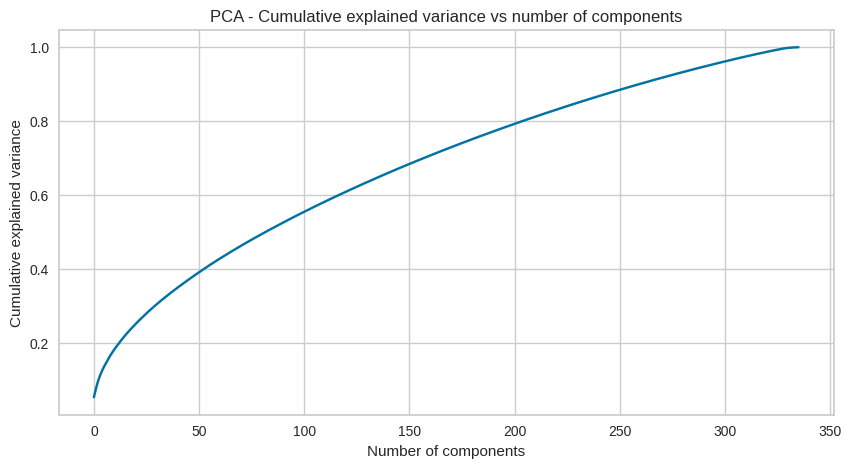

In [69]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [70]:
# Reducing the dimensions to .980 using PCA
pca = PCA(n_components=.980, random_state=42)
pca.fit(X)

# Transformed features
x_pca = pca.transform(X)

# Shape of transformed vectors
print("Shape of Transformed Vectors:", x_pca.shape)

Shape of Transformed Vectors: (6596, 315)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

 The chosen dimensionality reduction technique in this code is Principal Component Analysis (PCA), a widely utilized method when confronted with high-dimensional datasets. PCA aims to derive a lower-dimensional representation of the data while retaining crucial information and minimizing variance loss.


PCA operates by transforming the original features into a set of orthogonal components known as principal components. These components are ordered based on the variance they capture, with the first component capturing the maximum variance and subsequent components capturing remaining orthogonal variance. By selecting a specific number of principal components, the dataset's dimensionality can be effectively reduced.


The code includes a visualization of the explained variance ratio against the number of components, providing insights into the amount of variance retained as the dimensionality decreases. This visualization aids in determining an optimal number of components to preserve, striking a balance between dimensionality reduction and information retention. Overall, PCA proves to be a valuable tool for simplifying high-dimensional data and facilitating a more concise yet informative representation.

### 8. Data Splitting

##### What data splitting ratio have you used and why?


In the realm of unsupervised learning, which includes models such as hierarchical clustering and K-means clustering, the conventional practice of data splitting into training and testing sets, often paramount in supervised learning, is typically foregone. This departure stems from the intrinsic characteristics of unsupervised techniques, which do not hinge on labeled data for model training. Unlike supervised learning tasks where the model learns from a labeled subset and is then evaluated on unseen data, unsupervised models, like hierarchical clustering, progressively form clusters based on similarities, and K-means iteratively partitions the entire dataset into clusters. Since these algorithms don't rely on predetermined labels, utilizing the complete dataset allows for a more exhaustive exploration of inherent patterns and structures, fostering a comprehensive understanding of the intrinsic dynamics of the data.

In hierarchical clustering, the algorithm recursively forms clusters based on the similarity between data points, while K-means partitions the data into clusters iteratively. Since these algorithms operate without the need for ground truth labels, utilizing the entire dataset facilitates a comprehensive exploration of the underlying data dynamics. This holistic approach allows for the identification of natural groupings and relationships, promoting a more robust understanding of the intrinsic structure of the data without the conventional division into training and testing subsets. The absence of a need for labeled data during training aligns with the unsupervised learning paradigm, where the emphasis is on uncovering latent patterns rather than making predictions based on predefined outcomes.

# 9. Handling imbalanced data

Clustering is indeed an unsupervised learning technique where the primary objective is to identify natural patterns and groupings within a dataset without any predefined labels or classes. In clustering, the algorithm seeks to partition the data into clusters based on similarities between data points. Unlike supervised learning, where the goal is typically to predict a target variable with the help of labeled data, clustering operates in an unsupervised fashion, making it well-suited for tasks where the underlying structure or relationships within the data are not known in advance.


Because clustering doesn't involve predefined labels or classes, there is no concept of imbalance in the clustering process. Imbalance is a concern in supervised learning tasks, where the distribution of classes in the labeled dataset can affect the performance of the model. In clustering, the algorithm focuses solely on the intrinsic patterns and similarities in the data, making it agnostic to the concept of imbalance or predefined class labels.

## ***7. ML Model Implementation***

### ML Model - 1

# K-Means Clustering

In [72]:
# ML Model - 1 Implementation
def displayClusters(X, labels, centers):
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, s=10, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=15)
    plt.show()


In [73]:
plt.rcParams['figure.figsize'] = (10, 6)

# Create the KMeans model with n_init set explicitly
model = KMeans(random_state=10, n_init=10)

# Fit the algorithm
visualizer = KElbowVisualizer(model, k=(2, 15), metric='calinski_harabasz', timings=False, locate_elbow=False)
visualizer.fit(x_pca)

# Predict on the model (not necessary for the elbow visualization)
visualizer.show()
plt.show()

# 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [74]:
# Visualizing evaluation Metric Score chart
n_clusters_range = np.arange(2, 15)
max_score = -1
best_clusters = None

for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c, random_state=10, n_init=10)
    pred = clusterer.fit_predict(x_pca)
    score = silhouette_score(x_pca, pred)

    if score > max_score:
        max_score = score
        best_clusters = c

    print('For cluster', c, 'the silhouette score is', score)

print('The highest Silhouette score is obtained for', best_clusters, 'clusters.')

For cluster 2 the silhouette score is 0.03915404984162217
For cluster 3 the silhouette score is 0.047736195158577396
For cluster 4 the silhouette score is 0.0538806595211668
For cluster 5 the silhouette score is 0.05131051214162454
For cluster 6 the silhouette score is 0.05246483113372967
For cluster 7 the silhouette score is 0.044826059698955964
For cluster 8 the silhouette score is 0.04666542219945147
For cluster 9 the silhouette score is 0.0449564929864826
For cluster 10 the silhouette score is 0.04829643915881846
For cluster 11 the silhouette score is 0.046773485158735056
For cluster 12 the silhouette score is 0.03580789581712449
For cluster 13 the silhouette score is 0.03947539926468267
For cluster 14 the silhouette score is 0.03724154446139382
The highest Silhouette score is obtained for 4 clusters.


In [75]:
n_clusters_range = np.arange(2, 15)

for c in n_clusters_range:
    clusterer = KMeans(n_clusters=c, random_state=10, n_init=10)
    pred = clusterer.fit_predict(x_pca)
    centers = clusterer.cluster_centers_
    score = silhouette_score(x_pca, pred)
    inertia = clusterer.inertia_
    print('For cluster', c, 'the silhouette score is', score)
    displayClusters(x_pca, pred, centers)

Output hidden; open in https://colab.research.google.com to view.

From the above information we conclude that cluster 4 has highest silhouette score is 0.053


# 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid
params = {
    'n_clusters': [4],
    'random_state': [10],
    'max_iter': [15, 20],
    'tol': [0.01, 0.1]
}

# Create the KMeans model
kmeans = KMeans(n_init=10)

# Create the GridSearchCV object
kmeans_gridcv = GridSearchCV(kmeans, param_grid=params, verbose=2, cv=2)

# Fit the algorithm
kmeans_gridcv.fit(x_pca)

# Get the best estimator
best_kmeans = kmeans_gridcv.best_estimator_

# Predict on the model
labels = best_kmeans.predict(x_pca)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.01; total time=   1.5s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.01; total time=   3.3s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.1; total time=   3.5s
[CV] END max_iter=15, n_clusters=4, random_state=10, tol=0.1; total time=   1.3s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.01; total time=   1.4s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.01; total time=   1.4s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.1; total time=   1.3s
[CV] END max_iter=20, n_clusters=4, random_state=10, tol=0.1; total time=   1.3s


In [77]:
best_params = kmeans_gridcv.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_iter': 15, 'n_clusters': 4, 'random_state': 10, 'tol': 0.01}


# Which hyperparameter optimization technique have you used and why?

GridSearchCV stands as a widely adopted technique for methodically fine-tuning hyperparameters in machine learning models. This approach meticulously explores a predefined parameter grid, considering all possible combinations of hyperparameter values. By subjecting the model to each configuration and assessing its performance through cross-validation, GridSearchCV systematically identifies the set of hyperparameters that optimizes the chosen evaluation metric. The exhaustive nature of this search ensures a thorough exploration of the hyperparameter space, leaving no potential configuration unexplored. I opted for GridSearchCV in my hyperparameter optimization process for its comprehensive and systematic nature, providing a reliable means to uncover the most effective hyperparameter values for enhancing the KMeans model's performance on unseen data.

# ML Model 2:

# ML Model - 2 Hierarchical Clustering

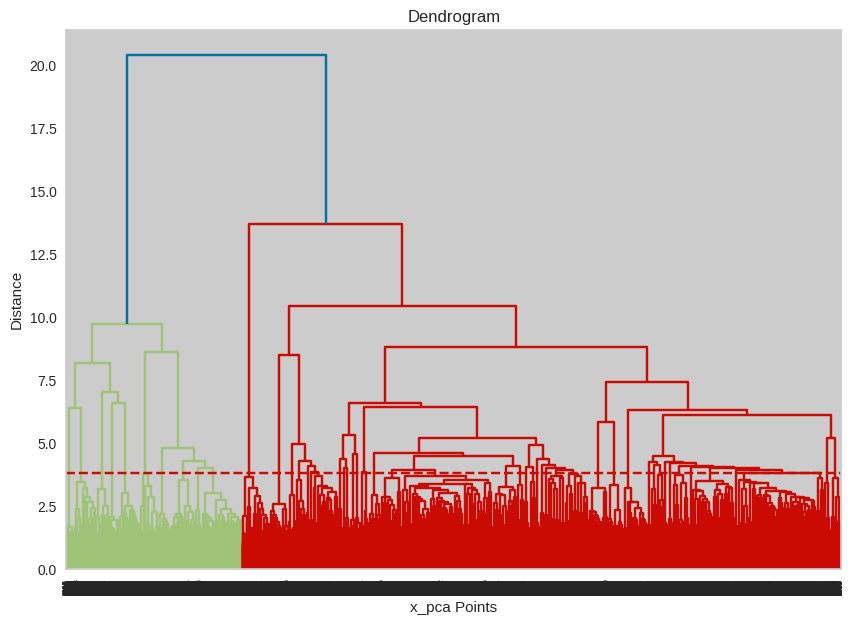

In [78]:
# ML model 2
linkage_matrix = shc.linkage(x_pca, method='ward')

# Ploting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = shc.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('x_pca Points')
plt.ylabel('Distance')

# Adding a horizontal line to indicate the desired number of clusters
plt.axhline(y=3.8, color='r', linestyle='--')
plt.show()


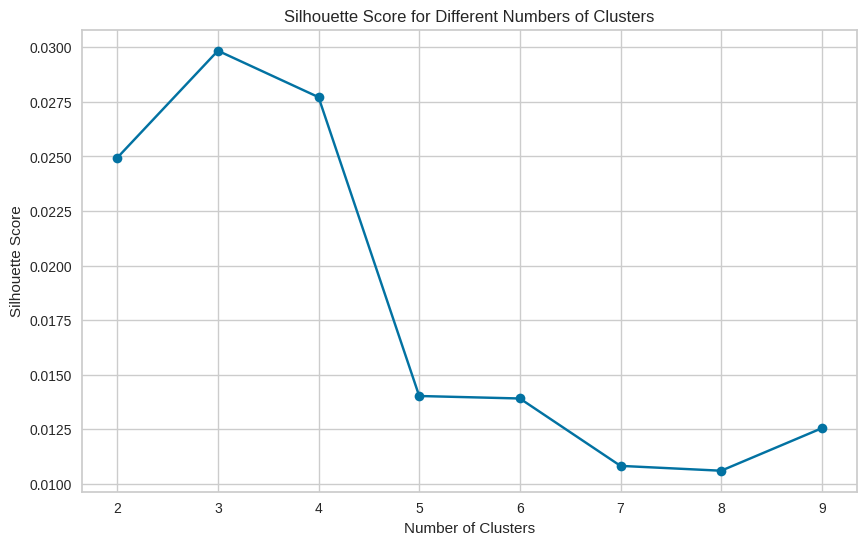

In [95]:
from sklearn.metrics import silhouette_score

# Define the range of cluster numbers
cluster_range = range(2, 10)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different numbers of clusters
for num_clusters in cluster_range:
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', metric='euclidean')
    hierarchical_labels = hierarchical.fit_predict(x_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_pca, hierarchical_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different numbers of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()


In [80]:
from sklearn.metrics import silhouette_score

# Define the range of cluster numbers
cluster_range = range(2, 10)

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different numbers of clusters and print the silhouette score
for num_clusters in cluster_range:
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', metric='euclidean')
    hierarchical_labels = hierarchical.fit_predict(x_pca)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(x_pca, hierarchical_labels)
    silhouette_scores.append(silhouette_avg)

    # Print the silhouette score for each number of clusters
    print(f"Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_avg}")


Number of Clusters: 2, Silhouette Score: 0.024937790685005044
Number of Clusters: 3, Silhouette Score: 0.02984301678312559
Number of Clusters: 4, Silhouette Score: 0.027714726410534615
Number of Clusters: 5, Silhouette Score: 0.014021194961960528
Number of Clusters: 6, Silhouette Score: 0.013907345340767045
Number of Clusters: 7, Silhouette Score: 0.010819415336625973
Number of Clusters: 8, Silhouette Score: 0.010597241307539291
Number of Clusters: 9, Silhouette Score: 0.012544528938819355


From the above silhouette scores it is clear that the 3 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 3 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 3 different formed clusters.

In [81]:


# Hierarchical clustering with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
hierarchical_labels = hierarchical.fit_predict(x_pca)

# Plotting the results
plt.figure(figsize=(10, 6), dpi=120)

# Scatter plot for each cluster
for cluster_num in range(3):
    plt.scatter(x_pca[hierarchical_labels == cluster_num, 0],
                x_pca[hierarchical_labels == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')

plt.legend()
plt.title('Hierarchical Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [82]:


# Hierarchical clustering with 3 clusters
hierarchical_3d = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
hierarchical_labels_3d = hierarchical_3d.fit_predict(x_pca)

# Plotting the results in 3D
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

# Scatter plot for each cluster in 3D
for i in range(len(colors)):
    ax.scatter(x_pca[hierarchical_labels_3d == i, 0],
               x_pca[hierarchical_labels_3d == i, 1],
               x_pca[hierarchical_labels_3d == i, 2],
               c=colors[i], label=f'Cluster {i + 1}')

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.legend()
plt.show()



In [83]:
# Assuming you've used hierarchical to store the Agglomerative Clustering model
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
hierarchical_labels = hierarchical.fit_predict(x_pca)

# Add cluster values to the dataframe
netflix_df['agglomerative_cluster'] = hierarchical_labels


In [84]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = netflix_df[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud


In [98]:
# Implementing the above defined function and plotting the wordcloud of each attribute
from wordcloud import WordCloud, STOPWORDS

def agglomerative_wordcloud(cluster_number, column_name, df):
    '''function for Building a wordcloud for the movie/shows'''

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df[[column_name, 'agglomerative_cluster']].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Return the word cloud object
    return wordcloud

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

for i in range(3):  # Loop over clusters (0, 1, 2)
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col, netflix_df))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [86]:
# Fit the Algorithm
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')

# Predict on the model
hierarchical_labels  = hierarchical.fit_predict(x_pca)

In [87]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=hierarchical_labels , s=10, cmap='Paired')
plt.show()

# ML Model 3 : Content based recommender system

We can build a simple content based recommender system based on the similarity of the shows.
If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.

In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'netflix_df' is your actual dataset
recommender_df = netflix_df.copy()

# Changing the index of the DataFrame to 'title'
recommender_df.set_index('title', inplace=True)

# Convert tokens to string (assuming 'description' is the relevant column)
recommender_df['description'] = recommender_df['description'].fillna('')  # Handle missing values if needed
recommender_df['description'] = recommender_df['description'].apply(lambda x: ' '.join(x.split()))

# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['description'])

# Cosine similarity
cosine_similarity_matrix = cosine_similarity(converted_matrix)

# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim=cosine_similarity_matrix):
    try:
        recommend_content = []
        idx = indices[indices == title].index[0]
        series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
        top10 = list(series.iloc[1:11].index)

        # List with the titles of the best 10 matching shows/movies
        for i in top10:
            recommend_content.append(list(recommender_df.index)[i])

        print("If you liked '" + title + "', you may also enjoy:\n")
        return recommend_content

    except:
        return 'Invalid Entry'

# Recommendations for 'A Man Called God'
recommendations_don = recommend_10('Zindagi Na Milegi Dobara')
print(recommendations_don)



If you liked 'Zindagi Na Milegi Dobara', you may also enjoy:

['Carol', '10 jours en or', 'Yours Fatefully', 'Unstoppable', 'Pocoyo Halloween: Space Halloween', 'Santa Clarita Diet', 'Dry Martina', 'Juanita', 'Justin Time', 'Face 2 Face']


In [89]:

# Recommendations for 'Stranger Things'
recommendations_stranger_things = recommend_10('Stranger Things')

# Convert the result to a list
recommendations_list = list(recommendations_stranger_things)
print(recommendations_list)


If you liked 'Stranger Things', you may also enjoy:

['Rowdy Rathore', 'The Autopsy of Jane Doe', 'Sakho & Mangane', 'Come and Find Me', 'Benji', 'Sinister Circle', 'Hardy Bucks', 'Broadchurch', 'Burning Cane', 'Sin Senos sí Hay Paraíso']


In [90]:
#
recommendations_peaky_blinders = recommend_10('Kaabil')
print(recommendations_peaky_blinders)

If you liked 'Kaabil', you may also enjoy:

['Diary of a Chambermaid', 'Million Dollar Beach House', 'The Last of the Schmucks', 'Bobby Kennedy for President', '14 Blades', 'David Attenborough: A Life on Our Planet', 'Manson Family Vacation', 'Little Singham in London', 'Woodstock', 'Marseille']


In [91]:
# Recommendations for kabir singh
recommendations_kabir_singh = recommend_10('Kabir Singh')
print(recommendations_kabir_singh)

If you liked 'Kabir Singh', you may also enjoy:

['Someone Like You', 'Krish Trish and Baltiboy: Battle of Wits', 'The Tribe', 'Badalte Rishton Ki Dastaan', 'Northern Rescue', 'Zubaan', 'Come and Find Me', 'Loudon Wainwright III: Surviving Twin', 'Our Idiot Brother', 'Welcome to the Family']


In [92]:
recommendations_family_man = recommend_10('A Family Man')
print(recommendations_family_man)

If you liked 'A Family Man', you may also enjoy:

['Bilu Rakkhosh', 'Hakkunde', 'A Mission in an Old Movie', 'Mantra', 'Manmadhudu 2', 'Ringan', 'Udaan', 'Truckbhar Swapna', 'The Ghost Who Walks', 'Belmonte']


In [103]:
recommendations_bhagam_bhag = recommend_10('Zubaan')
print(recommendations_bhagam_bhag)

If you liked 'Zubaan', you may also enjoy:

['Badalte Rishton Ki Dastaan', 'Bilu Rakkhosh', 'Once In A Lifetime Sessions with Moby', 'Tracy Morgan: Staying Alive', 'The Five', 'Wakefield', 'Goon: Last of the Enforcers', 'Blaze', 'My Next Guest with David Letterman and Shah Rukh Khan', 'Hunter X Hunter (2011)']


In [124]:
recommendations_dil_chahta_hai = recommend_10('Zero')
print(recommendations_dil_chahta_hai)

If you liked 'Zero', you may also enjoy:

['Fanatyk', 'Walking Out', 'Pablo', 'Rainbow Jelly', 'ViR: The Robot Boy', 'Eyyvah Eyyvah 2', 'The Ghost Who Walks', 'The Tribe', 'Ottaal', 'Badalte Rishton Ki Dastaan']


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Cosine Similarity:**

 In this model, cosine similarity is used to measure the similarity between two shows or movies based on their descriptions (or other selected features). Cosine similarity calculates the cosine of the angle between two vectors, providing a measure of similarity.

**Count Vectorization:**

 This technique is employed to convert textual data (e.g., show descriptions) into numerical vectors. Each word is represented by a unique index, and the vector contains the count of each word in the text.

**Recommendation Function:**

 The recommendation function (recommend_10) takes a show title as input, finds its index in the dataset, computes the cosine similarity with other shows, and returns the top 10 shows with the highest cosine similarity.

 **Performance Evaluation:**

**Choice of Evaluation Metric:**

In recommendation systems, it's common to evaluate performance using metrics such as precision, recall, F1-score, or mean squared error. However, in content-based recommendation systems, where the focus is on similarity, precision and recall might not be as applicable. Instead, user feedback and A/B testing can be valuable for assessing user satisfaction.

**Qualitative Assessment:**

You can qualitatively assess the recommendations by checking if the suggested shows are indeed similar in content to the input show. This involves manual inspection and user feedback.

**User Engagement Metrics:**

 For a real-world recommendation system, user engagement metrics such as click-through rate (CTR) or conversion rate can be important. If users click on or interact with the recommended shows, it indicates the system's effectiveness.

 **Score Chart:**

Since the model is content-based and does not rely on explicit user ratings, the typical score charts used in collaborative filtering (such as precision-recall curves or ROC curves) may not be directly applicable. Instead, consider monitoring user engagement metrics and gathering qualitative feedback from users.

**Continuous Improvement:**

Regularly update the content features used for recommendations.
Explore other text processing techniques or embeddings for better representation.
Collect and analyze user feedback to make iterative improvements.
Remember that the success of a recommendation system depends on both quantitative metrics and user satisfaction, and a combination of approaches (e.g., content-based and collaborative filtering) might provide more robust recommendations.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

K-Means Clustering

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

We have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:


Speed: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

Ease of use: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

Scalability: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

Independence of clusters: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# *8.* *Future Work (Optional)*

1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [109]:
# Save the File
import joblib
# 'kmeans' is the best performing K-Means model
# Save the model to a file using joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [110]:
# Load the File and predict unseen data.
# Load the saved model
loaded_kmeans_model = joblib.load('kmeans_model.pkl')

# **Conclusion**

In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).


It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.


It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.



We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 3. This was obtained through the elbow method and Silhouette score analysis.
Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 9. This was obtained after visualizing the dendrogram.


A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

# Thank You...!